In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:

cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
trans_data = pd.read_csv('Transaction_ID.csv')
data = [cab_data,city_data,customer_data,trans_data]

In [3]:
for i in data:

    print(i.head(),sep = '\n')
    print(i.shape)
    

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
(359392, 7)
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
(20, 3)
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               108

In [4]:
for i in data:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

In [5]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
cab_data['Date of Travel'].max()

43465

In [7]:
import datetime
datetime.date(1899,12,30) + datetime.timedelta(days=42377)

datetime.date(2016, 1, 8)

In [8]:
def date_conversion(col):
    date = []
    import datetime 
    for j in col:
        k = datetime.date(1899,12,30) + datetime.timedelta(days=j)
        date.append(k)
    return date

    
cab_data['Date of Travel']= date_conversion(cab_data['Date of Travel'])
cab_data.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [10]:
#Checking whether these columns have unique values
print(cab_data['Transaction ID'].is_unique)
print(trans_data['Transaction ID'].is_unique)
print(customer_data['Customer ID'].is_unique)
print(trans_data['Customer ID'].is_unique)

True
True
True
False


In [11]:
trans_cust = pd.merge(trans_data,customer_data, on = 'Customer ID')
trans_cust.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [12]:
trans_cust.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [13]:
#Performing outer join
trans_cab_outer = pd.merge(trans_cust,cab_data,how = 'outer',on = 'Transaction ID')
trans_cab_outer.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [14]:
trans_cab_outer.isnull().sum()

Transaction ID            0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
Date of Travel        80706
Company               80706
City                  80706
KM Travelled          80706
Price Charged         80706
Cost of Trip          80706
dtype: int64

In [15]:
#performing inner join
final= pd.merge(trans_cust,cab_data,on = 'Transaction ID')
final.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [16]:
final.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [18]:
def type_conversion(col):
    var = []
    for j in col:
        k = float(j.replace(',',''))
        var.append(k)
    return var

    
city_data['Population']= type_conversion(city_data['Population'])
city_data['Users']= type_conversion(city_data['Users'])
city_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [19]:
city_data['cab_rate_usage'] = city_data['Users']/city_data['Population']
city_data.head()

,City,Population,Users,cab_rate_usage
0,NEW YORK NY,8405837.0,302149.0,0.035945
1,CHICAGO IL,1955130.0,164468.0,0.084121
2,LOS ANGELES CA,1595037.0,144132.0,0.090363
3,MIAMI FL,1339155.0,17675.0,0.013199
4,SILICON VALLEY,1177609.0,27247.0,0.023138


[Text(0, 0, 'NEW YORK NY'),
 Text(1, 0, 'CHICAGO IL'),
 Text(2, 0, 'LOS ANGELES CA'),
 Text(3, 0, 'MIAMI FL'),
 Text(4, 0, 'SILICON VALLEY'),
 Text(5, 0, 'ORANGE COUNTY'),
 Text(6, 0, 'SAN DIEGO CA'),
 Text(7, 0, 'PHOENIX AZ'),
 Text(8, 0, 'DALLAS TX'),
 Text(9, 0, 'ATLANTA GA'),
 Text(10, 0, 'DENVER CO'),
 Text(11, 0, 'AUSTIN TX'),
 Text(12, 0, 'SEATTLE WA'),
 Text(13, 0, 'TUCSON AZ'),
 Text(14, 0, 'SAN FRANCISCO CA'),
 Text(15, 0, 'SACRAMENTO CA'),
 Text(16, 0, 'PITTSBURGH PA'),
 Text(17, 0, 'WASHINGTON DC'),
 Text(18, 0, 'NASHVILLE TN'),
 Text(19, 0, 'BOSTON MA')]

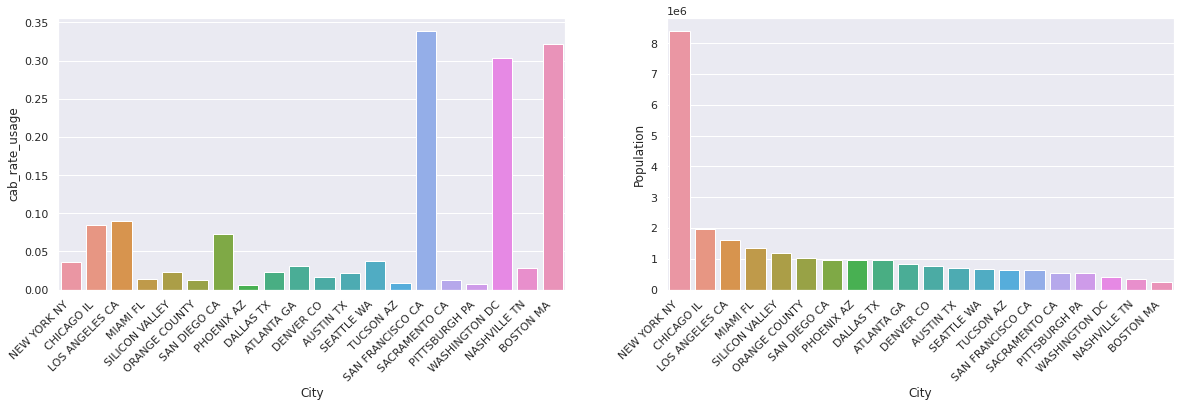

In [20]:

sns.set(rc={'figure.figsize':(20,5)})
fig, ax =plt.subplots(1,2)


x1 = sns.barplot(x="City", y="cab_rate_usage",  data=city_data,ax = ax[0])
x2 = sns.barplot(x="City", y="Population", data=city_data ,ax= ax[1])



x1.set_xticklabels(x1.get_xticklabels(), rotation=45, horizontalalignment='right')
x2.set_xticklabels(x2.get_xticklabels(), rotation=45, horizontalalignment='right')

Visualizing how different cities respond to the cab industry

In [21]:
final['DayOfWeek'] = final['Date of Travel'].dt.day_name()
final['month'] = final['Date of Travel'].dt.month_name()
final.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DayOfWeek,month
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Friday,January
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Saturday,July
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Friday,November
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Wednesday,January
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Saturday,April


<AxesSubplot:xlabel='Company', ylabel='count'>

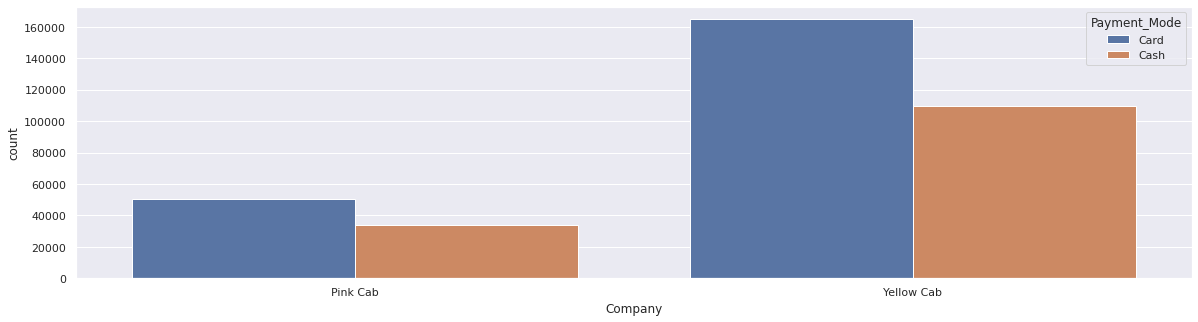

In [22]:
sns.countplot(x = 'Company',hue = 'Payment_Mode',data = final)

Seeing which company has more customers and the mode of payment mostly used in both companies.
Yellow cab has more customers and card is the mostly used mode of payment in both companies

<AxesSubplot:xlabel='month', ylabel='Price Charged'>

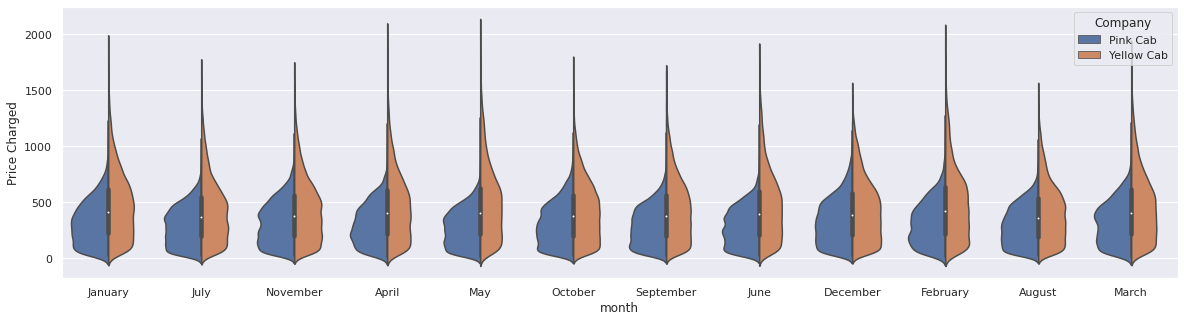

In [23]:
sns.violinplot(x="month", y="Price Charged",hue='Company',split='True', data=final)

Visualizing the distribution of cab charges in different months.From the graphs,we see pink cab has lower charges than yellow cab.Though most charges in pink cab don't go beyond 500 dollars as compared to pink cab which go higher than that.

In [24]:
Ret = final.groupby(['Customer ID','Company'])['Transaction ID'].count()
Ret

Customer ID  Company   
1            Pink Cab       4
             Yellow Cab    25
2            Pink Cab       4
             Yellow Cab    36
3            Pink Cab       6
                           ..
59998        Yellow Cab     6
59999        Pink Cab       2
             Yellow Cab     6
60000        Pink Cab       4
             Yellow Cab    14
Name: Transaction ID, Length: 72226, dtype: int64

Trying to see which company retains it's customers more.Customers who use yellow cab always tend to use yellow cab again as compared to pink cab

In [25]:
final['Profit']=final['Price Charged']-final['Cost of Trip']
final.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DayOfWeek,month,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Friday,January,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Saturday,July,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Friday,November,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Wednesday,January,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Saturday,April,253.9808


In [26]:
bins = [0,18,25,35,55,75,100]
group_names = ['Teen','Young','Adult','Mid-adult','Old','Senior-citizen']
final['Age groups'] = pd.cut(final['Age'],bins = bins,labels = group_names)
final['Age groups'].value_counts()

Mid-adult         114558
Adult             113414
Young              82498
Old                38076
Teen               10846
Senior-citizen         0
Name: Age groups, dtype: int64

In [27]:
bins = [0,20000,45000,140000,200000]
group_names = ['Low Income','Middle Class','Upper Middle Class','High Income']
final['Social Classes'] = pd.cut(final['Income (USD/Month)'] * 12,bins = bins,labels = group_names)
final['Social Classes'].value_counts()


Upper Middle Class    110519
High Income            71901
Middle Class           25187
Low Income                 0
Name: Social Classes, dtype: int64

In [28]:
final.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,DayOfWeek,month,Profit,Age groups,Social Classes
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Friday,January,57.3150,Adult,Upper Middle Class
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Saturday,July,281.2772,Adult,Upper Middle Class
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Friday,November,194.6480,Adult,Upper Middle Class
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Wednesday,January,23.6660,Adult,Upper Middle Class
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Saturday,April,253.9808,Adult,Upper Middle Class


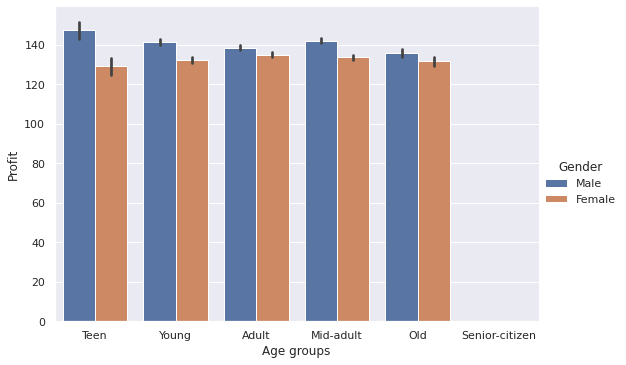

In [29]:

sns.catplot(x="Age groups", y="Profit", hue="Gender", kind="bar", data=final,height = 5,aspect = 1.5)

Visualizing which age group contributes more to the cab industry and which gender in that age group has higher profits.The male teens take the lead and males overall spend more on cabs than the females

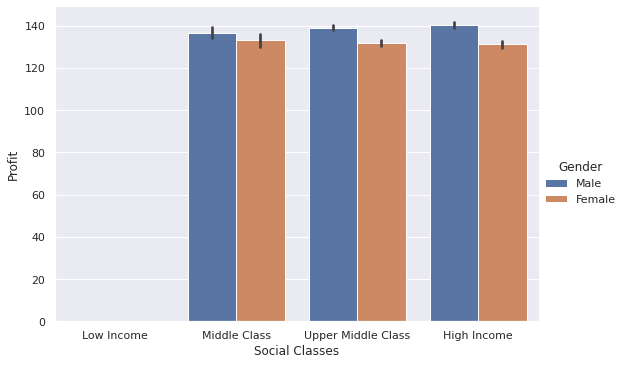

In [30]:
sns.catplot(x="Social Classes", y="Profit", hue="Gender", kind="bar", data=final,height = 5,aspect = 1.5)

Visualizing which social class contributes more to the cab industry and which gender in that social class has higher profits.The male high income guys take the lead and males overall spend more on cabs than the females

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

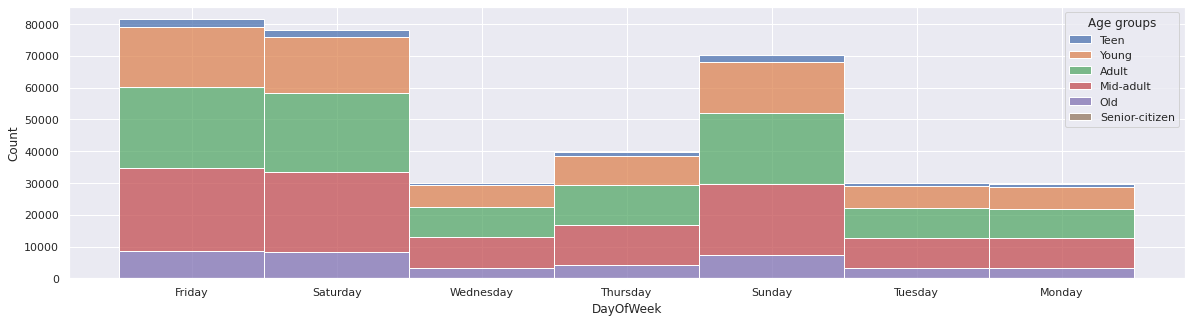

In [31]:
sns.histplot(binwidth=0.5, x="DayOfWeek", hue="Age groups", data=final, stat='count', multiple="stack")


Visualizing which day of the week is the busiest and which age group use cabs most on those specific days.Friday,Saturday,Sunday are the busiest in that order then Thursday.Moday,Tuesday and Wednesday seem to tie.Also mid adults and Adults are the most cab users in all the days.Teens are the least cab users.

<AxesSubplot:xlabel='DayOfWeek', ylabel='Count'>

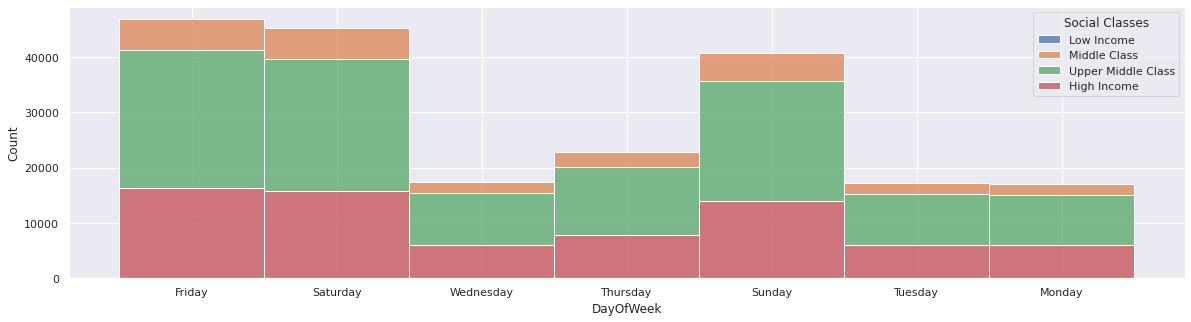

In [32]:
sns.histplot(binwidth=0.5, x="DayOfWeek", hue="Social Classes", data=final, stat='count', multiple="stack")


Visualizing which day of the week is the busiest and which social class use cabs most on those specific days.Friday,Saturday,Sunday are the busiest in that order then Thursday.Moday,Tuesday and Wednesday seem to tie.Also Upper middle class are the most cab users in all the days.Middle class are the least cab users.

<AxesSubplot:xlabel='month', ylabel='Count'>

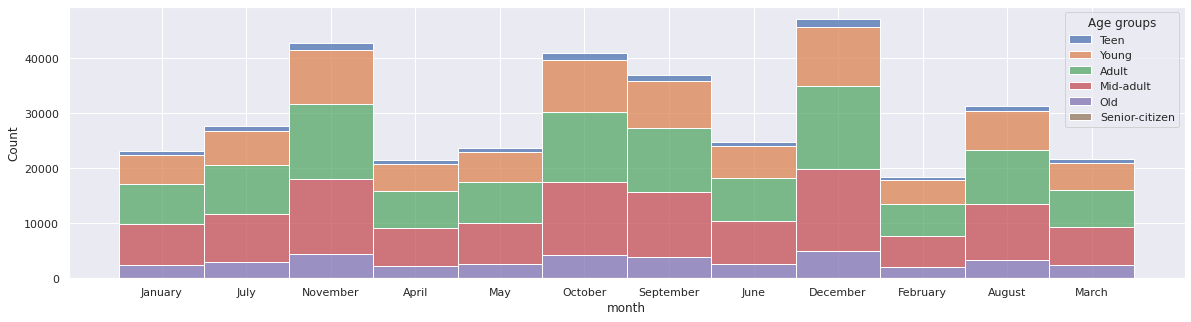

In [33]:
sns.histplot(binwidth=0.5, x="month", hue="Age groups", data=final, stat='count', multiple="stack")


Visualizing which month is the busiest and which age group use cabs most on those specific months.August to December are the busiest starting from Dec backwards.Feb is the worst performing.Also mid adults and Adults are the most cab users in all the days.Teens are the least cab users.

<AxesSubplot:xlabel='month', ylabel='Count'>

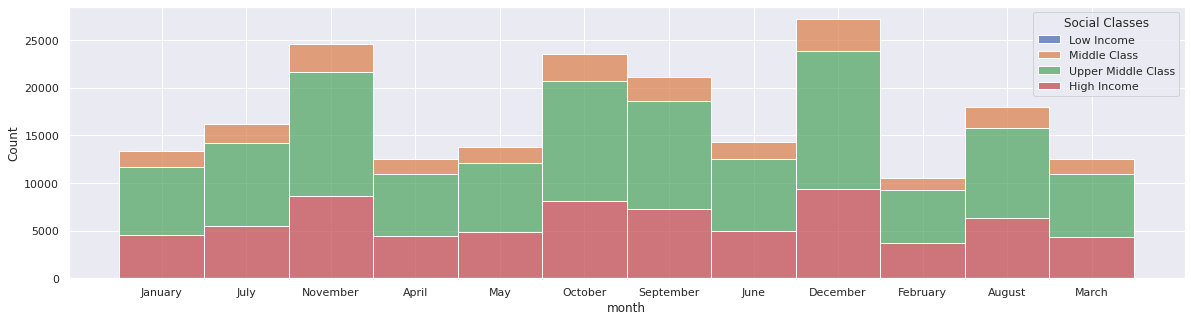

In [34]:
sns.histplot(binwidth=0.5, x="month", hue="Social Classes", data=final, stat='count', multiple="stack")


Visualizing which month is the busiest and which social class use cabs most on those specific months.August to December are the busiest starting from Dec backwards.Feb is the worst performing.Also Upper middle class and high income are the most cab users in all the days.Middle class are the least cab users.

In [35]:
final['Year'] = final['Date of Travel'].dt.year


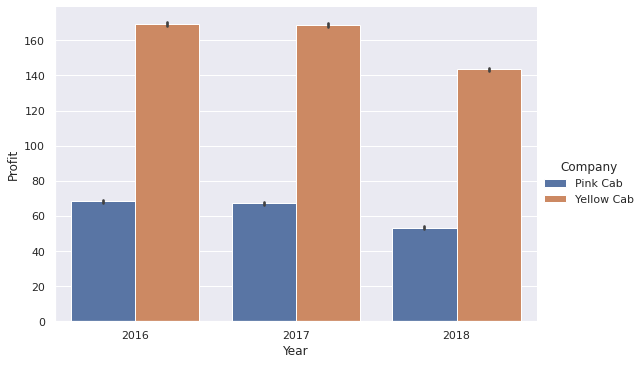

In [36]:
sns.catplot(x="Year", y="Profit", hue="Company", kind="bar", data=final,height = 5,aspect = 1.5)

Visualing which company has more profits in specific years.Yellow cab takes the lead

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'ATLANTA GA'),
  Text(1, 0, 'AUSTIN TX'),
  Text(2, 0, 'BOSTON MA'),
  Text(3, 0, 'CHICAGO IL'),
  Text(4, 0, 'DALLAS TX'),
  Text(5, 0, 'DENVER CO'),
  Text(6, 0, 'LOS ANGELES CA'),
  Text(7, 0, 'MIAMI FL'),
  Text(8, 0, 'NASHVILLE TN'),
  Text(9, 0, 'NEW YORK NY'),
  Text(10, 0, 'ORANGE COUNTY'),
  Text(11, 0, 'PHOENIX AZ'),
  Text(12, 0, 'PITTSBURGH PA'),
  Text(13, 0, 'SACRAMENTO CA'),
  Text(14, 0, 'SAN DIEGO CA'),
  Text(15, 0, 'SEATTLE WA'),
  Text(16, 0, 'SILICON VALLEY'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'WASHINGTON DC')])

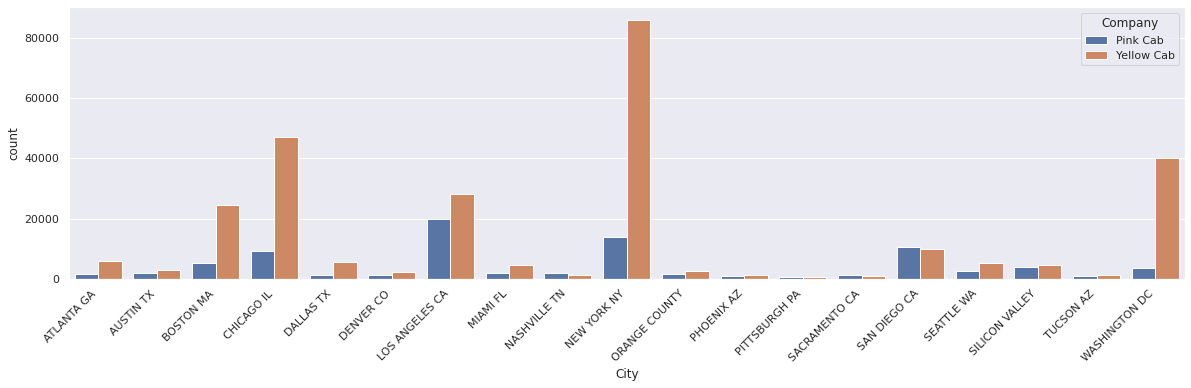

In [37]:
sns.countplot(x="City",hue = 'Company' ,data=final)
plt.xticks(rotation=45, horizontalalignment='right')

Seeing distribution of cabs individual cities

# HYPOTHESIS TESTING

In [38]:
#Correlation btn population and cab_rate_usage in city data set
city_data.corr()

,Population,Users,cab_rate_usage
Population,1.000000,0.703382,-0.150312
Users,0.703382,1.000000,0.505742
cab_rate_usage,-0.150312,0.505742,1.000000


In [45]:
from scipy.stats import spearmanr
stat,p = spearmanr(city_data['Population'],city_data['cab_rate_usage'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  -0.04661654135338346
p_value =  0.8452698052894374
Variables independent


In [46]:
from scipy.stats import spearmanr
stat,p = spearmanr(city_data['Population'],city_data['Users'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  0.3578947368421052
p_value =  0.12130112810947345
Variables independent


From the above hypothesis a high population doesn't mean a high number of cab_users

In [50]:
from scipy.stats import spearmanr
stat,p = spearmanr(final['Age'],final['Profit'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  -0.004510646836374898
p_value =  0.006848841864306197
Variables dependent


In [56]:
from scipy.stats import pearsonr
stat,p = pearsonr(final['Age'],final['Profit'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  -0.005092963667618834
p_value =  0.002264105651669707
Variables dependent


Investigating age of the customers can be considered when one wants to maximize Profits and it turns out it's a factor worth considering

In [57]:
from scipy.stats import spearmanr
stat,p = spearmanr(final['Income (USD/Month)'],final['KM Travelled'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  -0.00041454151794138925
p_value =  0.8037367904333328
Variables independent


In [58]:
from scipy.stats import spearmanr
stat,p = pearsonr(final['Income (USD/Month)'],final['KM Travelled'])

print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  -0.0005440623059591995
p_value =  0.744302926824886
Variables independent


Investigating if a customer earns more whether he/she will travel a longer distance than one who is earning less thus more profits and turns out income isn't an issue maybe there are other factors that makes one travel more 

In [61]:
table = pd.crosstab(final['Gender'],final['Company'])
table

Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [63]:
from scipy.stats import chi2_contingency
stat,p,dof,expected = chi2_contingency(table)
print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  107.22063897254299
p_value =  3.982674650131372e-25
Variables dependent


Investigating whether gender can be an issue when it comes to giving priority in the choice of cab.Seems to be true.
The male prefer a certain cab and females the other

In [64]:
table1 = pd.crosstab(final['Payment_Mode'],final['Social Classes'])
table1

Social Classes,Middle Class,Upper Middle Class,High Income
Payment_Mode,,,
Card,15144,66282,42945
Cash,10043,44237,28956


In [65]:
from scipy.stats import chi2_contingency
stat,p,dof,expected = chi2_contingency(table1)
print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  1.6665847086325642
p_value =  0.434616018279386
Variables independent


In [66]:
table2= pd.crosstab(final['Payment_Mode'],final['Age groups'])
table2

Age groups,Teen,Young,Adult,Mid-adult,Old
Payment_Mode,,,,,
Card,6539,49428,67850,68711,22976
Cash,4307,33070,45564,45847,15100


In [67]:
from scipy.stats import chi2_contingency
stat,p,dof,expected = chi2_contingency(table2)
print('stat = ',stat)
print('p_value = ', p)
if p > 0.05:
    print('Variables independent')
else:
    print('Variables dependent')

stat =  3.7587299294489913
p_value =  0.4396417038421502
Variables independent


Social Class and age doesn't affect the mode of payment

# Recommendations